# Dataset Information

- **Dataset Overview:** 
The Iris Flower dataset consists of 150 instances of iris flowers, categorized into three species: Iris Setosa, Iris Versicolour, and Iris Virginica.


- **Features:** 
Each instance is described by four features measured in centimeters—
1. sepal length
2. sepal width 
3. petal length  
4. petal width


- **Class Characteristics:** 
Notably, the dataset exhibits a unique property where one class is linearly separable from the other two, while the remaining two are not linearly separable from each other.


- **Objective:** 
This project aims to explore and analyze the dataset, leveraging classification algorithms to predict the iris species based on their distinct features.

# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df = pd.read_csv(r"D:\data set\IRIS dataset.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the basic stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocessing the dataset

In [5]:
## As the df.info is stating that data is not having any null value. 
#therefor no need to deal with preprocessing.

# Exploratory Data Analysis

Histogram Analysis

<Axes: >

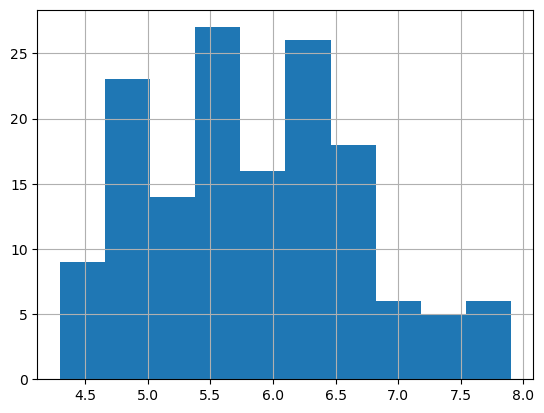

In [6]:
df["sepal_length"].hist()

<Axes: >

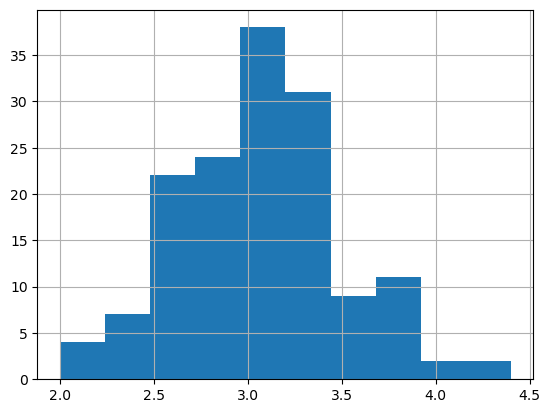

In [7]:
df["sepal_width"].hist()

<Axes: >

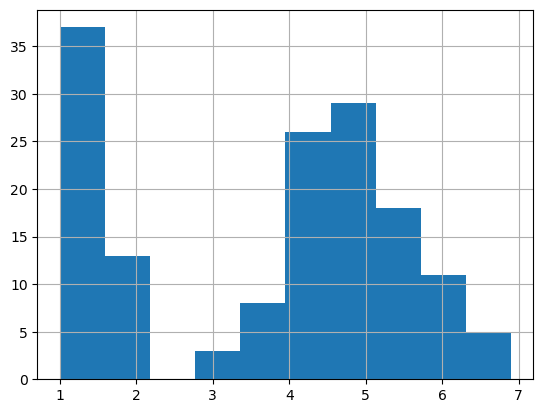

In [8]:
df["petal_length"].hist()

<Axes: >

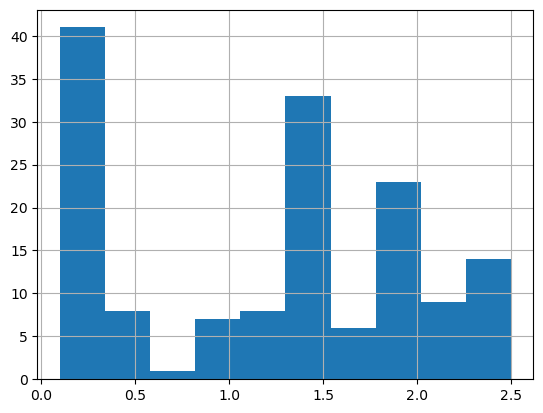

In [9]:
df["petal_width"].hist()

Scatterplot Analysis 

In [10]:
colors = ["green","orange","blue"]
species = ["Iris-virginica", "Iris-versicolor","Iris-setosa"]

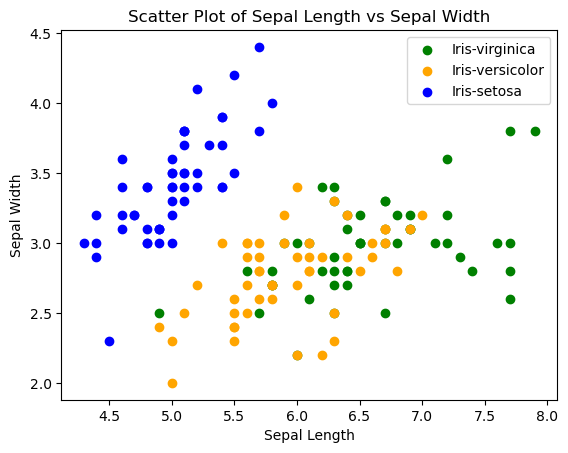

In [11]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["sepal_length"], x["sepal_width"], c=colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("Scatter Plot of Sepal Length vs Sepal Width")
    plt.legend()
plt.show()


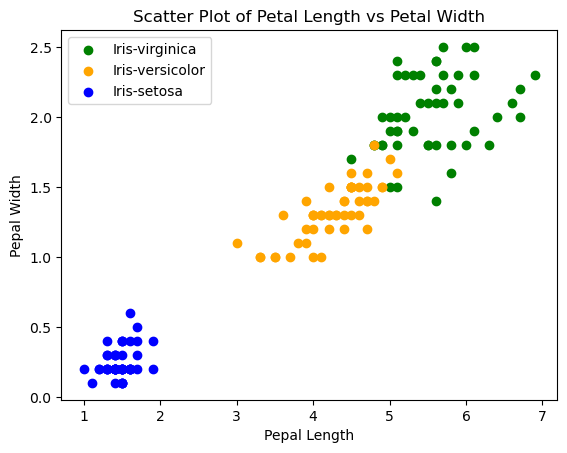

In [12]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["petal_length"], x["petal_width"], c=colors[i], label=species[i])
    plt.xlabel("Pepal Length")
    plt.ylabel("Pepal Width")
    plt.title("Scatter Plot of Petal Length vs Petal Width")
    plt.legend()
plt.show()

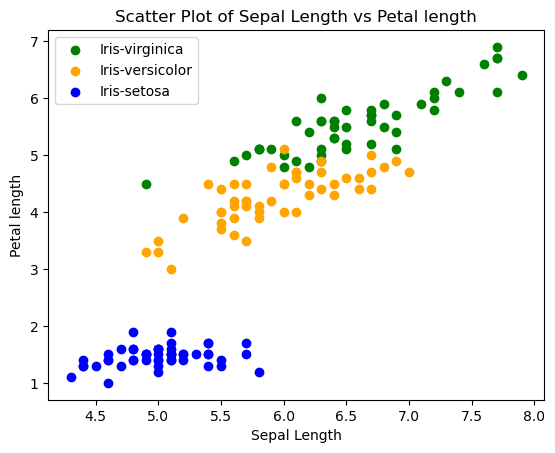

In [13]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["sepal_length"], x["petal_length"], c=colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal length")
    plt.title("Scatter Plot of Sepal Length vs Petal length")
    plt.legend()
plt.show()

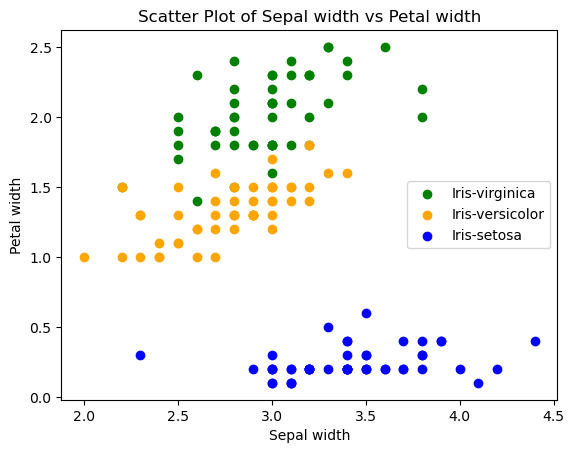

In [14]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["sepal_width"], x["petal_width"], c=colors[i], label=species[i])
    plt.xlabel("Sepal width")
    plt.ylabel("Petal width")
    plt.title("Scatter Plot of Sepal width vs Petal width")
    plt.legend()
plt.show()

Coorelation matrix

In [15]:
df.corr()

C:\Users\DEll\AppData\Local\Temp\ipykernel_34704\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\DEll\AppData\Local\Temp\ipykernel_34704\225707790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

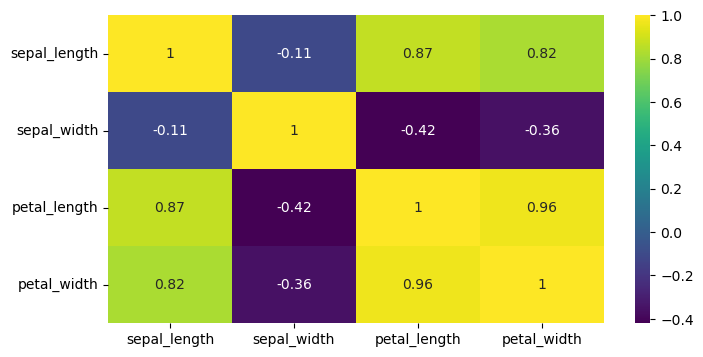

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr,annot=True, ax=ax, cmap = "viridis")

# Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df["species"]= le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [32]:
from sklearn.model_selection import train_test_split
# allocating train set 80% ratio.
# allocating test set 20% ratio.
x = df.drop(columns = ["species"])
y = df["species"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.03, random_state = 0)

Applying model

In [33]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [34]:
#checking matrix
print("Accuracy :",model.score(x_test,y_test)*100)

Accuracy : 100.0


In [35]:
#knn- k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier()
model_2.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
#checking matrix
print("Accuracy :",model_2.score(x_test,y_test)*100)

Accuracy : 100.0


In [37]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()
model_3.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
#checking matrix
print("Accuracy :",model_3.score(x_test,y_test)*100)

Accuracy : 100.0


In [39]:
# Saving model 
import pickle
filename = "savemodel.sav"
pickle.dump(model_2, open(filename,"wb"))

In [41]:
load_model = pickle.load(open(filename,"rb"))

In [42]:
load_model.predict([[4.6, 3.1, 1.5, 0.2]])

C:\Users\DEll\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])